# AutoEncode
- 표현(특징) 학습
    * 데이터에서 주요 특징을 찾아 압축 후 복원하는 학습 모델
- 구성
    * 인코더(Encoder) : 입력 데이터에서 주요 특징 추출 / 압축
    * 디코더(Decoder) : 주요 특징에서 원본 데이터로 복원

In [168]:
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.utils import set_random_seed, plot_model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

### [1] 데이터 준비 및 로딩

In [169]:
set_random_seed(11)

In [170]:
(x_train, y_train), (x_test, y_test) = load_data()

In [171]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

### [2] 데이터 전처리

In [172]:
x_train = x_train.reshape(-1, 28 * 28) / 255.
x_test = x_test.reshape(-1, 28 * 28) / 255.

In [173]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [174]:
x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, stratify=(y_train)
)

In [175]:
x_train.shape

(45000, 784)

### [3] 모델 생성 및 구성

In [176]:
def createModel(n_node) :
    model = Sequential()
    model.add(Dense(n_node, activation = 'relu', input_shape = (784,)))
    model.add(Dense(784, activation = 'sigmoid'))
    model.compile(loss = 'mean_squared_error', optimizer = 'adam')
    return model

In [177]:
model1 = createModel(28)
model2 = createModel(56)
model4 = createModel(112)

In [178]:
model1.summary(), model2.summary(), model4.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_78 (Dense)            (None, 28)                21980     
                                                                 
 dense_79 (Dense)            (None, 784)               22736     
                                                                 
Total params: 44,716
Trainable params: 44,716
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_80 (Dense)            (None, 56)                43960     
                                                                 
 dense_81 (Dense)            (None, 784)               44688     
                                                                 
Total params: 88,648
Train

(None, None, None)

In [179]:
model1.fit(x_train, x_train, epochs = 1)
model2.fit(x_train, x_train, epochs = 1)
model4.fit(x_train, x_train, epochs = 1)

1407/1407 [==============================] - 3s 2ms/step - loss: 0.0223


In [180]:
model1.evaluate(x_test, y_test)
model2.evaluate(x_test, y_test)
model4.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 27.0015


27.001468658447266

### [5] 예측

In [181]:
pre_out1 = model1.predict(x_val[0].reshape(-1, 784))
pre_out2 = model2.predict(x_val[0].reshape(-1, 784))
pre_out4 = model4.predict(x_val[0].reshape(-1, 784))

1/1 [==============================] - 0s 43ms/step


#### 원본 이미지와 AutoEncode 진행된 이미지 비교

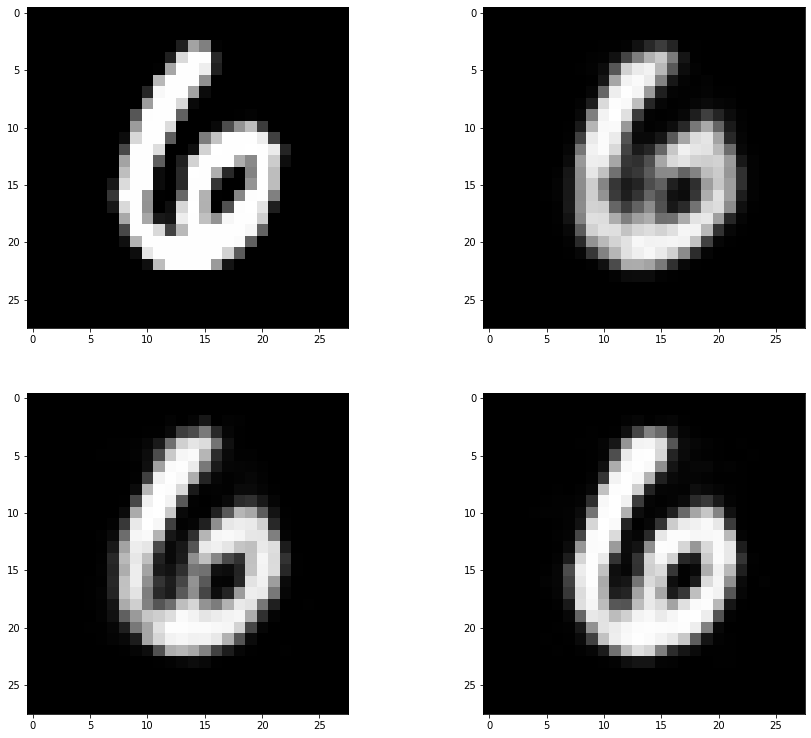

In [182]:
plt.figure(figsize = (15,13))
plt.subplot(2,2,1)
plt.imshow(x_val[0].reshape(28,28), cmap='gray')

plt.subplot(2,2,2)
plt.imshow(pre_out1.reshape(28,28), cmap='gray')

plt.subplot(2,2,3)
plt.imshow(pre_out2.reshape(28,28), cmap='gray')

plt.subplot(2,2,4)
plt.imshow(pre_out4.reshape(28,28), cmap='gray')